In [218]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
extra = pd.read_csv('greeks.csv')
id = train['Id']
train.drop('Id',axis = 1,inplace=True)

In [219]:
print(f'train shape: {train.shape}')
print(f'test shape: {test.shape}')
train.head()

train shape: (617, 57)
test shape: (5, 57)


,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,4126.58731,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,5496.92824,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,5135.78024,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,4169.67738,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,5728.73412,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1


In [220]:
train['EJ'].head()

0    B
1    A
2    B
3    B
4    B
Name: EJ, dtype: object

In [260]:
extra['Gamma'].value_counts()

M    445
N     64
H     53
B     18
A     11
F     10
G      8
E      8
Name: Gamma, dtype: int64

In [222]:
extra.shape

(617, 6)

In [223]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AB      617 non-null    float64
 1   AF      617 non-null    float64
 2   AH      617 non-null    float64
 3   AM      617 non-null    float64
 4   AR      617 non-null    float64
 5   AX      617 non-null    float64
 6   AY      617 non-null    float64
 7   AZ      617 non-null    float64
 8   BC      617 non-null    float64
 9   BD      617 non-null    float64
 10  BN      617 non-null    float64
 11  BP      617 non-null    float64
 12  BQ      557 non-null    float64
 13  BR      617 non-null    float64
 14  BZ      617 non-null    float64
 15  CB      615 non-null    float64
 16  CC      614 non-null    float64
 17  CD      617 non-null    float64
 18  CF      617 non-null    float64
 19  CH      617 non-null    float64
 20  CL      617 non-null    float64
 21  CR      617 non-null    float64
 22  CS

In [224]:
train.isnull().sum().sort_values(ascending=False)

EL       60
BQ       60
CC        3
CB        2
FS        2
FL        1
FC        1
DU        1
GL        1
EE        0
EB        0
EU        0
DY        0
EH        0
DV        0
EJ        0
EP        0
EG        0
AB        0
DL        0
FD        0
FE        0
FI        0
FR        0
GB        0
GE        0
GF        0
GH        0
GI        0
DN        0
DH        0
DI        0
AF        0
AH        0
AM        0
AR        0
AX        0
AY        0
AZ        0
BC        0
BD        0
BN        0
BP        0
BR        0
BZ        0
CD        0
CF        0
CH        0
CL        0
CR        0
CS        0
CU        0
CW        0
DA        0
DE        0
DF        0
Class     0
dtype: int64

In [225]:
test.isnull().sum().sort_values(ascending=False)

Id     0
DH     0
DL     0
DN     0
DU     0
DV     0
DY     0
EB     0
EE     0
EG     0
EH     0
EJ     0
EL     0
EP     0
EU     0
FC     0
FD     0
FE     0
FI     0
FL     0
FR     0
FS     0
GB     0
GE     0
GF     0
GH     0
GI     0
DI     0
DF     0
AB     0
DE     0
AF     0
AH     0
AM     0
AR     0
AX     0
AY     0
AZ     0
BC     0
BD     0
BN     0
BP     0
BQ     0
BR     0
BZ     0
CB     0
CC     0
CD     0
CF     0
CH     0
CL     0
CR     0
CS     0
CU     0
CW     0
DA     0
GL     0
dtype: int64

In [226]:
train['Class'].value_counts(dropna=False)

0    509
1    108
Name: Class, dtype: int64

In [227]:
train.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
count,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,617.000000,...,616.000000,617.000000,615.000000,617.000000,617.000000,617.000000,617.000000,617.000000,616.000000,617.000000
mean,0.477149,3502.013221,118.624513,38.968552,10.128242,5.545576,0.060320,10.566447,8.053012,5350.388655,...,5.433199,3.533905,0.421501,20.724856,131.714987,14679.595398,31.489716,50.584437,8.530961,0.175041
std,0.468388,2300.322717,127.838950,69.728226,10.518877,2.551696,0.416817,4.350645,65.166943,3021.326641,...,11.496257,50.181948,1.305365,9.991907,144.181524,19352.959387,9.864239,36.266251,10.327010,0.380310
min,0.081187,192.593280,85.200147,3.177522,8.138688,0.699861,0.025578,3.396778,1.229900,1693.624320,...,0.173229,0.497060,0.067730,4.102182,72.611063,13.038894,9.432735,0.897628,0.001129,0.000000
25%,0.252107,2197.345480,85.200147,12.270314,8.138688,4.128294,0.025578,8.129580,1.229900,4155.702870,...,0.173229,0.497060,0.067730,14.036718,72.611063,2798.992584,25.034888,23.011684,0.124392,0.000000
50%,0.354659,3120.318960,85.200147,20.533110,8.138688,5.031912,0.025578,10.461320,1.229900,4997.960730,...,3.028141,1.131000,0.250601,18.771436,72.611063,7838.273610,30.608946,41.007968,0.337827,0.000000
75%,0.559763,4361.637390,113.739540,39.139886,8.138688,6.431634,0.036845,12.969516,5.081244,6035.885700,...,6.238814,1.512060,0.535067,25.608406,127.591671,19035.709240,36.863947,67.931664,21.978000,0.000000
max,6.161666,28688.187660,1910.123198,630.518230,178.943634,38.270880,10.315851,38.971568,1463.693448,53060.599240,...,137.932739,1244.227020,31.365763,135.781294,1497.351958,143790.071200,81.210825,191.194764,21.978000,1.000000


In [228]:
test.describe()

,AB,AF,AH,AM,AR,AX,AY,AZ,BC,BD,...,FI,FL,FR,FS,GB,GE,GF,GH,GI,GL
count,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='Class'>

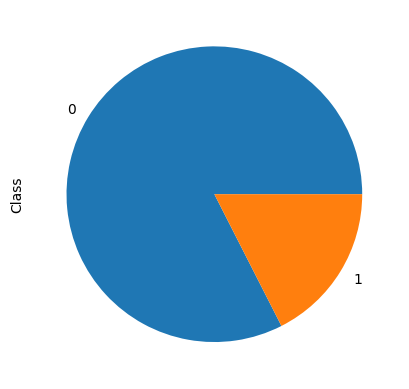

In [229]:
plot_df = train.Class.value_counts()
plot_df.plot(kind="pie")

In [230]:
train['EJ'].value_counts(dropna=False)

B    395
A    222
Name: EJ, dtype: int64

In [231]:
train['Class'].value_counts(dropna=False)

0    509
1    108
Name: Class, dtype: int64

<Axes: >

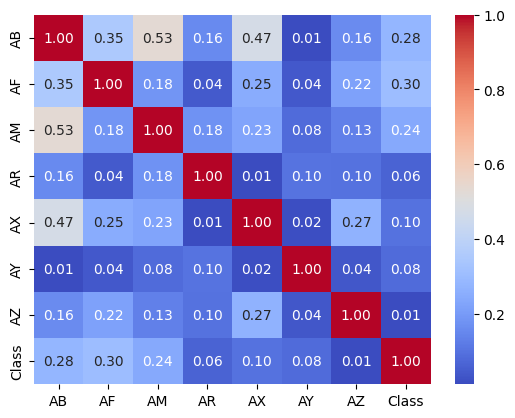

In [232]:
import seaborn as sns
sns.heatmap(train[['AB' ,'AF','AM','AR','AX','AY','AZ','Class']].corr() , annot=True,fmt='.2f',cmap='coolwarm')

C:\Users\bxand\AppData\Local\Temp\ipykernel_17764\725738614.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr() ,cmap='coolwarm')


<Axes: >

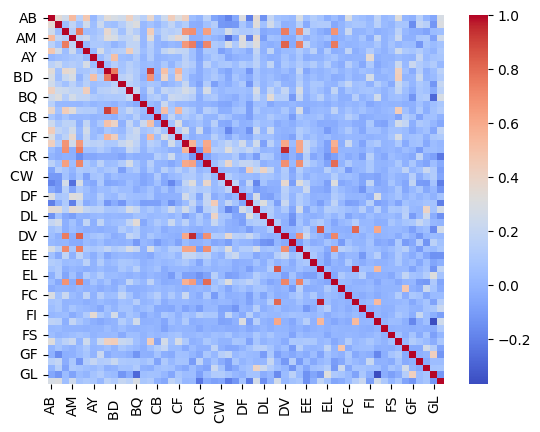

In [233]:
sns.heatmap(train.corr() ,cmap='coolwarm')

In [234]:

# Assuming 'df' is your DataFrame and 'Class' is the target column
correlations = train.corr()['Class']

# Filter the columns with correlation below 0.05
columns_to_drop = correlations[correlations < 0.05].index

# Drop the columns from the DataFrame
train.drop(columns_to_drop, axis=1, inplace=True)

train.shape


C:\Users\bxand\AppData\Local\Temp\ipykernel_17764\1808968467.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corr()['Class']


(617, 30)

In [235]:
train.isnull().sum().sort_values(ascending=False)

EL       60
BQ       60
FL        1
DU        1
AB        0
DI        0
GI        0
GB        0
FR        0
FE        0
FD        0
EJ        0
EH        0
EB        0
DY        0
DF        0
AF        0
CF        0
CD        0
BZ        0
BR        0
BP        0
BN        0
BD        0
BC        0
AY        0
AX        0
AR        0
AM        0
Class     0
dtype: int64

In [236]:
train = train.drop(['EL' , 'BQ'] , axis = 1)
train.isnull().sum().sort_values(ascending=False)

FL       1
DU       1
AB       0
AF       0
GI       0
GB       0
FR       0
FE       0
FD       0
EJ       0
EH       0
EB       0
DY       0
DI       0
DF       0
CF       0
CD       0
BZ       0
BR       0
BP       0
BN       0
BD       0
BC       0
AY       0
AX       0
AR       0
AM       0
Class    0
dtype: int64

In [237]:
#train['Embarked'].fillna(mode , inplace=True)
train['FL'].describe()

count    616.000000
mean       5.433199
std       11.496257
min        0.173229
25%        0.173229
50%        3.028141
75%        6.238814
max      137.932739
Name: FL, dtype: float64

In [238]:
# Find the row index with the missing value in the 'FL' column
row_index = train['FL'].isnull().idxmax()

# Get the value of 'Class' in that row
class_value = train.loc[row_index, 'Class']

# Calculate the mean of 'FL' based on the 'Class' value
mean_value = train[train['Class'] == class_value]['FL'].mean()

# Replace the missing value with the mean value in the specific row
train.loc[row_index, 'FL'] = mean_value

train.loc[594,'FL']

4.139886513848425

In [239]:
train['DU'].describe()

count    616.000000
mean       1.802900
std        9.034721
min        0.005518
25%        0.005518
50%        0.251741
75%        1.058690
max      161.355315
Name: DU, dtype: float64

In [240]:
row_index = train['DU'].isnull().idxmax()

# Get the value of 'Class' in that row
class_value = train.loc[row_index, 'Class']

# Calculate the mean of 'DU' based on the 'Class' value
mean_value = train[train['Class'] == class_value]['DU'].mean()

# Replace the missing value with the mean value in the specific row
train.loc[row_index, 'DU'] = mean_value

train.loc[594,'DU']

0.7165168393700787

In [241]:
train.isnull().sum().sort_values(ascending=False)

AB       0
AF       0
GI       0
GB       0
FR       0
FL       0
FE       0
FD       0
EJ       0
EH       0
EB       0
DY       0
DU       0
DI       0
DF       0
CF       0
CD       0
BZ       0
BR       0
BP       0
BN       0
BD       0
BC       0
AY       0
AX       0
AR       0
AM       0
Class    0
dtype: int64

In [242]:
import numpy as np
neg, pos = np.bincount(train['Class'])

w0 = 1
w1 = neg/pos
class_weight = {0:w0,1:w1}
print(class_weight)

{0: 1, 1: 4.712962962962963}


In [243]:
train['EJ'] = train['EJ'].map({'A':1,'B':0})
train['EJ'].value_counts()

0    395
1    222
Name: EJ, dtype: int64

In [244]:
x_train = train.drop('Class',axis = 1)
y_train = train['Class']
print(x_train.shape)
print(y_train.shape)

(617, 27)
(617,)


In [245]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)

In [247]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(class_weight=class_weight)
forest.fit(x_train,y_train)
acc_forest = forest.score(x_train,y_train)
print(acc_forest)

1.0


In [248]:
from sklearn.model_selection import cross_val_score
cv_result=(cross_val_score(RandomForestClassifier(class_weight=class_weight),x_train,y_train,scoring='accuracy',cv=5))

In [249]:

cv_mean=(cv_result.mean())
cv_std=(cv_result.std())

In [250]:
cv_res = pd.DataFrame({'cv_mean':cv_mean, 'cv_std':cv_std,'algo':['forest']})
cv_res.sort_values(by='cv_mean',ascending=False)

,cv_mean,cv_std,algo
0,0.896315,0.026626,forest


In [251]:
from sklearn.model_selection import GridSearchCV
grid = {'n_estimators':[30,100,150,200,300],
        'max_depth':[1,2,3,4],
        'criterion': ['gini','entropy','log_loss'],
        }

tuner = GridSearchCV(RandomForestClassifier(class_weight=class_weight),grid,refit=True,verbose=3)

tuner.fit(x_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=30;, score=0.887 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=30;, score=0.774 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=30;, score=0.846 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=30;, score=0.870 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=30;, score=0.846 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.895 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.750 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.862 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.870 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.837 total time=   0.0s
[CV 1/5] END criterion=

GridSearchCV(estimator=RandomForestClassifier(class_weight={0: 1,
                                                            1: 4.712962962962963}),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [30, 100, 150, 200, 300]},
             verbose=3)

In [252]:
tuner.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'n_estimators': 100}

In [253]:
tuner.score(x_train,y_train)

0.940032414910859

In [254]:
cross_val_score(tuner,x_train,y_train,scoring='accuracy',cv=5,verbose=1).mean()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=30;, score=0.778 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=30;, score=0.848 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=30;, score=0.869 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=30;, score=0.898 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=30;, score=0.878 total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.778 total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.859 total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.879 total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.898 total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=1, n_estimators=100;, score=0.888 total time=   0.0s
[CV 1/5] END criterion=

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.6min finished


0.8979150275373721

In [256]:
probabilities = tuner.predict_proba(x_train)

# Create a DataFrame with the probabilities
df_probabilities = pd.DataFrame(probabilities, columns=['Probability_0', 'Probability_1'])

# Print the DataFrame with the probabilities
print(df_probabilities)

     Probability_0  Probability_1
0         0.261164       0.738836
1         0.936803       0.063197
2         0.746514       0.253486
3         0.533801       0.466199
4         0.442159       0.557841
..             ...            ...
612       0.909597       0.090403
613       0.595554       0.404446
614       0.740628       0.259372
615       0.775820       0.224180
616       0.754845       0.245155

[617 rows x 2 columns]


In [ ]:
hack_data  = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/test.csv')
sample     = pd.read_csv('/kaggle/input/icr-identify-age-related-conditions/sample_submission.csv')

hack_data.drop(columns_to_drop, axis=1, inplace=True)
hack_data = hack_data.drop(['EL' , 'BQ'] , axis = 1)
hack_data = hack_data.fillna(hack_data.median())
hack_data = hack_data.ffill()
hack_data['EJ'] = hack_data['EJ'].replace({'A': 1, 'B': 0})

hack_data_probabilities = tuner.predict_proba(hack_data)

sub_dict= {
        "Id": sample['Id'],
        "class_0": hack_data_probabilities[:, 0],
        "class_1": hack_data_probabilities[:, 1]
        }

sub = pd.DataFrame(sub_dict)
display(sub.describe().T)
sub.to_csv("submission.csv", index=False)

sub=pd.read_csv("submission.csv")
display(sub)